# Problem 5: Locally Weighted Linear Regression

## (a)
An easy computation shows that
\begin{align}
    J(\theta) = (X\theta-y)^T W (X\theta-y)
\end{align}
where $W = 1/2\mbox{diag}(w^{(1)},\dots,w^{(m)})$.

## (b)
One sees that
$$
\frac{\partial J}{\partial\theta_i} = \sum_{k=1}^m w^{(k)}(\theta^Tx^{(k)}-y^{(k)})x^{(k)}_i = (W(X\theta -y))^T x^{(-)}_i
$$
where $x^{(-)}_i$ denotes the $i$th column in $X$. Hence, equating
$$
0 = \nabla J(\theta) = X^T W(X\theta-y)
$$
we get that $\theta = (X^T W X)^{-1}X^T W y$. For $W = 1/2\cdot I$, this matches the unweighted case.

## (c)
... easy computation.

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0,"/home/kasperh/Documents/MachineLearning/PS1/src")
import util
from linear_model import LinearModel


def main(tau, train_path, eval_path):
    """Problem 5(b): Locally weighted regression (LWR)

    Args:
        tau: Bandwidth parameter for LWR.
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
    """
    # Load training set
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)

    # *** START CODE HERE ***
    # Fit a LWR model
    # Get MSE value on the validation set
    # Plot validation predictions on top of training set
    # No need to save predictions
    # Plot data
    # *** END CODE HERE ***


class LocallyWeightedLinearRegression(LinearModel):
    """Locally Weighted Regression (LWR).

    Example usage:
        > clf = LocallyWeightedLinearRegression(tau)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def __init__(self, tau):
        super(LocallyWeightedLinearRegression, self).__init__()
        self.tau = tau
        self.x = None
        self.y = None

    def fit(self, x, y):
        """Fit LWR by saving the training set.

        """
        # *** START CODE HERE ***
        self.x = x
        self.y = y
        # *** END CODE HERE ***

    def predict(self, x):
        """Make predictions given inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        m = len(x)
        pred = []
        for i in range(m):
            W = np.diag([np.exp(-np.linalg.norm(self.x[j]-x[i])**2/(2*self.tau**2)) for j in range(len(self.x))])
            theta = np.linalg.inv(self.x.T@W@self.x)@self.x.T@W@self.y
            pred.append(theta@x[i])
        return pred
        # *** END CODE HERE ***

In [60]:
train_path = "data/ds5_train.csv"
valid_path = "data/ds5_valid.csv"
test_path = "data/ds5_test.csv"

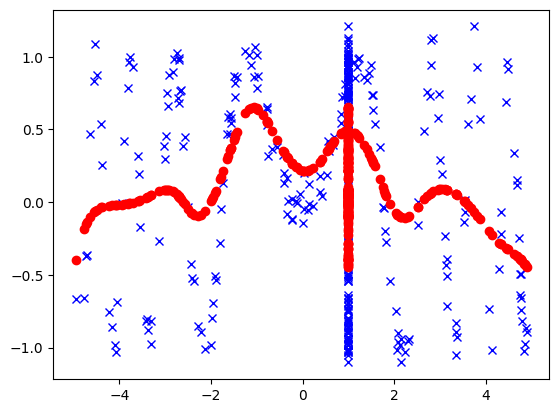

In [61]:
x_train,y_train = util.load_dataset(train_path,label_col = "y",add_intercept = True)
x_valid,y_valid = util.load_dataset(valid_path,label_col = "y",add_intercept = True)


model = LocallyWeightedLinearRegression(0.5)
model.fit(x_train,y_train)
pred = model.predict(x_valid)

plt.figure()
plt.plot(x_valid,y_valid,"bx")
plt.plot(x_valid,pred,"ro")


In [62]:
#Compute mean squared error
print("MSE: ",np.mean((pred-y_valid)**2))

MSE:  0.33053126821375245


## (c) 
We must do as in exercise (b) for the tau-values 3/100, 5/100, 1/10, 5/10,1,10. Then we must report the tau which gives the smallest MSE.


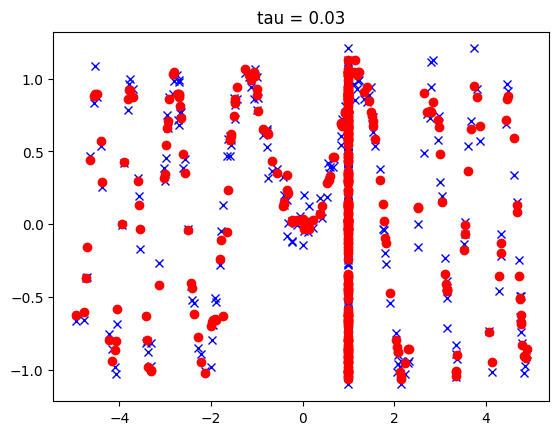

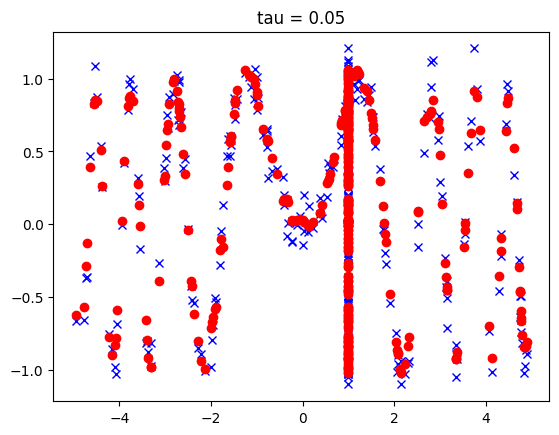

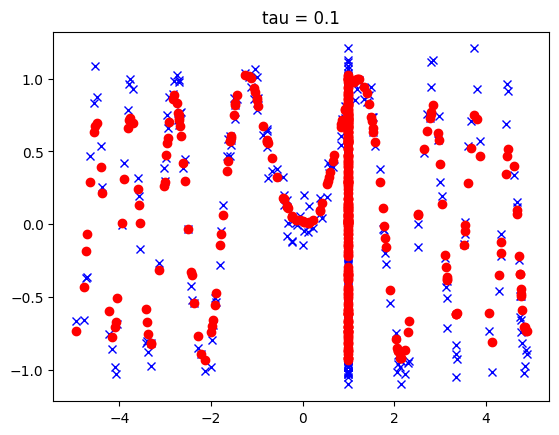

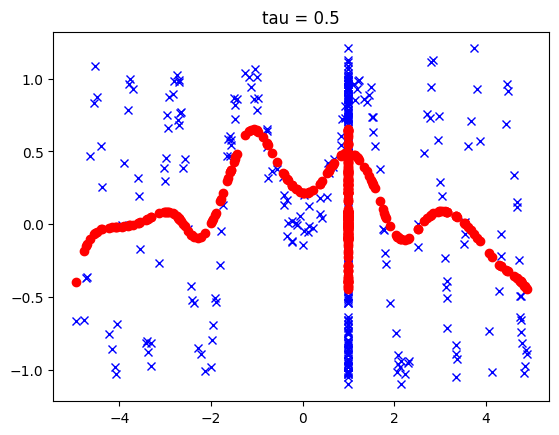

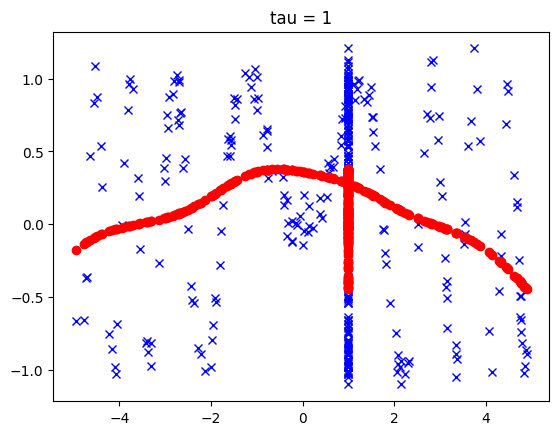

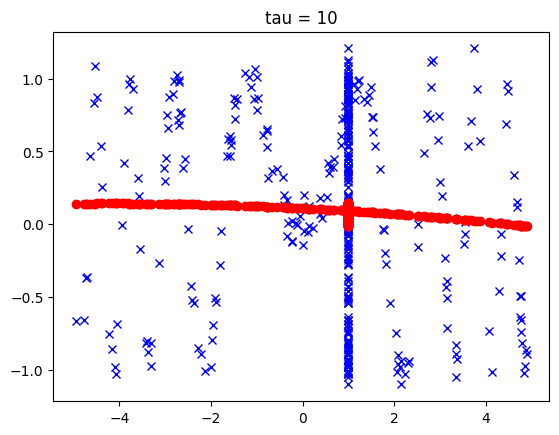

In [63]:
tau_values = [3/100,5/100,1/10,1/2,1,10]
MSE = 100
bes_tau = -1
for tau in tau_values:
    model = LocallyWeightedLinearRegression(tau)
    model.fit(x_train,y_train)
    pred = model.predict(x_valid)

    plt.figure()
    plt.title("tau = "+str(tau))
    plt.plot(x_valid,y_valid,"bx")
    plt.plot(x_valid,pred,"ro")
    this_MSE = np.mean((y_valid-pred)**2)
    if(this_MSE < MSE):
        best_tau=tau
        MSE = this_MSE


In [64]:
print("The best choice of tau is: ",best_tau)
print("The smallest MSE is: ",MSE)

The best choice of tau is:  0.05
The smallest MSE is:  0.012400076150477666
